# Импорт библиотек

In [9]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

DEBUG: 2024-10-03 14:02:25,417: matplotlib data path: d:\Python\Lib\site-packages\matplotlib\mpl-data
DEBUG: 2024-10-03 14:02:25,424: CONFIGDIR=C:\Users\Фёдор\.matplotlib
DEBUG: 2024-10-03 14:02:25,455: interactive is False
DEBUG: 2024-10-03 14:02:25,456: platform is win32
DEBUG: 2024-10-03 14:02:25,530: CACHEDIR=C:\Users\Фёдор\.matplotlib
DEBUG: 2024-10-03 14:02:25,535: Using fontManager instance from C:\Users\Фёдор\.matplotlib\fontlist-v390.json
DEBUG: 2024-10-03 14:02:25,831: Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: 2024-10-03 14:02:25,833: Loaded backend inline version unknown.


# Загрузка данных

In [10]:
df = pd.read_csv('./KaggleV2-May-2016.csv')

# Разведочный анализ данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Анализ целевой переменной

*Каково соотношение людей, которые пропускают приемы, к тем, кто этого не делает?*

DEBUG: 2024-10-03 14:02:26,130: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG: 2024-10-03 14:02:26,130: findfont: score(FontEntry(fname='d:\\Python\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG: 2024-10-03 14:02:26,131: findfont: score(FontEntry(fname='d:\\Python\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2024-10-03 14:02:26,132: findfont: score(FontEntry(fname='d:\\Python\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG: 2024-10-03 14:02:26,133: findfont: score(FontEntry(

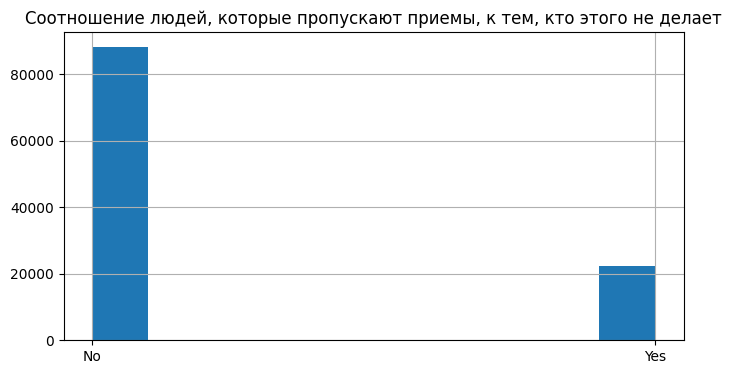

In [12]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [13]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

*Кто не появляется чаще — мужчины или женщины?*

In [14]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

# Предобработка данных

**Кодировка категориальных признаков**

In [15]:
categorical_columns_names = ['Gender', 'Neighbourhood']

In [16]:
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

**Обработка пропусков в данных**

In [17]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Нам повезло — в нашем наборе данных нет нулевых значений.

## 3. Логирование экспериментов

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [18]:
import logging

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

- отладка;
- информация;
- предупреждение;
- ошибка;
- критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [19]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG: 2024-10-03 14:02:26,829: This is a debug message
INFO: 2024-10-03 14:02:26,830: This is an informational message
ERROR: 2024-10-03 14:02:26,832: This is an error message
CRITICAL: 2024-10-03 14:02:26,833: This is a critical message


Обратите внимание, что сообщения debug() и info() не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (DEBUG). 

Чтобы сделать это, нужно сначала сбросить настройки библиотеки logging, перезапустив наш ноутбук. В VS Code это делается с помощью кнопки перезапуска:

Другой вариант сбросить настройки logging — воспользоваться функцией reload() из вспомогательной системной библиотеки importlib:

In [20]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'd:\\Python\\Lib\\logging\\__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [21]:
logging.basicConfig(level=logging.DEBUG)

Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции print(). Обычно логирование производится в специальные лог-файлы, для этого используются обработчики (хендлеры) логов. Давайте рассмотрим пример логирования в файл.

### УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

Функция обработчиков ведения журналов состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами logger может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно. Подробнее ознакомиться с видами хендлеров можно здесь.

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала log_file.log:

In [22]:
logging.FileHandler('log_file.log')

<FileHandler d:\Python\IDE_SF\SkillFactory\EDA-5\log_file.log (NOTSET)>

### УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: уровень: имя: сообщение. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала. Так как мы вновь переопределяем настройки библиотеки logging, то не забудем сбросить конфигурацию.

In [23]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2024-10-03 14:02:26,887: Check


✍️ Теперь, когда вы понимаете основы модуля logging в Python, посмотрим, как можно его использовать при проведении экспериментов по машинному обучению. Давайте залогируем информацию о нашем датасете Medical Appointment No Shows. 

Создадим функцию get_logger() для генерации лог-файла и записи в него информации.

In [24]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

Итак, get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:

In [25]:
!mkdir logs

�������� ��� 䠩� logs 㦥 �������.


Создадим лог-файл и запишем туда информацию о датасете.

In [26]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2024-10-03 14:02:26,944: Data
INFO: 2024-10-03 14:02:26,945: Data shape (110527, 14)
C:\Users\Фёдор\AppData\Local\Temp\ipykernel_26228\2576330178.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))
INFO: 2024-10-03 14:02:26,959: Percentage of women: 0.653882342398853
C:\Users\Фёдор\AppData\Local\Temp\ipykernel_26228\2576330178.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))
INFO: 2024-10-03 14:02:26,973:

В директории logs появится файл data.logs

⭐️ Отлично! Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [27]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2024-10-03 14:03:46,012: Data shape is incorrect!


## 4. Знакомство с Comet.ml

→ Comet.ml — это онлайн-платформа, позволяющая отслеживать эксперименты. Основное преимущество Comet состоит в том, что с её помощью можно легко построить панель отчётности и систему мониторинга.

In [31]:
# Создайте эксперимент с помощью вашего API ключа

from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key="4qUXvTBRkd8tWRat9TwBzAZ80",
  project_name="medical-appointment",
  workspace="the0"
)

DEBUG: 2024-10-03 14:46:32,469: No INI file found: []
DEBUG: 2024-10-03 14:46:32,469: No INI file found: ['./.comet.config']
DEBUG: 2024-10-03 14:46:32,470: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2024-10-03 14:46:32,471: No INI file found: ['~/.comet.config']
DEBUG: 2024-10-03 14:46:32,471: Looking up key: disable, namespace: ['comet', 'auto_log']
DEBUG: 2024-10-03 14:46:32,472: Searching <ConfigOSEnv> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-10-03 14:46:32,472: Searching <ConfigEnvFileEnv: None> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-10-03 14:46:32,472: Searching <ConfigDictEnv: {}> for COMET_AUTO_LOG_DISABLE
DEBUG: 2024-10-03 14:46:32,473: Found nothing--returning NO_VALUE
DEBUG: 2024-10-03 14:46:32,473: Looking up key: url_override, namespace: ['comet']
DEBUG: 2024-10-03 14:46:32,474: Searching <ConfigOSEnv> for COMET_URL_OVERRIDE
DEBUG: 2024-10-03 14:46:32,474: Searching <ConfigEnvFileEnv: None> for COMET_URL_OVERRIDE
DEBUG: 2024-10-03 14:46:32,474: Search

DEBUG: 2024-10-03 14:46:39,017: Looking up key: git_directory, namespace: ['comet']
DEBUG: 2024-10-03 14:46:39,019: Searching <ConfigOSEnv> for COMET_GIT_DIRECTORY
DEBUG: 2024-10-03 14:46:39,019: Searching <ConfigEnvFileEnv: None> for COMET_GIT_DIRECTORY
DEBUG: 2024-10-03 14:46:39,019: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_3D-PANEL': True, 'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ADMIN-DASHBOARD-DOWNLOAD-REPORTS': False, 'COMET_OVERRIDE_FEATURE_ANONYMOUS-MODE': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_AUTOGENERATED-PANELS': False, 'COMET_OVERRIDE_FEATURE_BI-USAGE-REPORT': False, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CURVES-PANEL': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRI

Класс Experiment — это интерфейс локального кода для Comet. Он определяет множество методов, описанных в официальной документации Comet. Платформа позволяет хранить информацию о коде, логировать графики, гиперпараметры модели (о них вы узнаете дальше в курсе), метрики. 

Давайте рассмотрим некоторые популярные методы:

- log_metric() и log_metrics() — логируют в эксперименте одну или несколько оценочных метрик, таких как accuracy;
- log_figure() — логирует рисунок;
- display() — создаёт интерактивную среду в Jupyter, показывающую приборную панель Comet как вывод ячейки;
- end() — если эксперимент выполняется в Jupyter, этот метод указывает, что эксперимент завершён.

После завершения эксперимента Comet предоставляет информационную панель, где можно увидеть все залогированные в коде метрики, цифры, параметры и так далее.

Показатели оценки отображаются автоматически. Например, если эксперимент состоит из нескольких шагов, можно легко нарисовать графики, показывающие метрики в зависимости от количества шагов.

Ниже представлен пример графика, иллюстрирующего изменение accuracy на каждом шаге обучения нейронной сети (про нейронные сети вы узнаете далее по курсу). 

Итак, Comet.ml — это платформа для экспериментов с машинным обучением, которую специалисты по данным используют для отслеживания, сравнения и объяснения своих экспериментов по машинному обучению. Она обеспечивает воспроизведение моделей, простое обслуживание рабочего процесса машинного обучения и бесперебойную совместную работу на протяжении всего жизненного цикла проекта.  